**This is for Week 2 Assignment for Capstone Project.**

## 1. Introduction

### 1.1 Background 

In 2017, Seattle police reported 10,959 motor vehicle collisions on city streets.There were a total of 187 fatal and serious injury collisions on Seattle streets. Due to the high number of collisions each year, the SDOT Traffic Management Division (TMD) has worked tirelessly to reduce the numbers. To do this, it has relied on its years of experience and historical data to determine the locations, months/days/times where most collisions took place. This information is crucial to SDOT TMD to understand the factors that contribute to collisions. For instance, more severe collisions in a specific intersection on Fri nights may be a red flag that certain mitigations may be required. For instance, it could indicate larger number of traffic on Fri nights combined with poor lighting and/or road signs. The TMD could then work on addressing these potential issues to reduce traffic collisions and unnecessary injuries/fatalities or property damage.

### 1.2 Problem Statement
High number of collisions over last 16 years, from Oct 2003 to Aug 2020 - 221266 collisions. Data such as location, time of the collision, number of vehicles involved would be used to determine what causes the higher rate of collisions.

### 1.3 Target Audience
SDOT Traffic Management Division, Traffic Records Group would be very interested in understanding the sources of traffic collisions. This would help them to make the Seattle roads safer. Also, for all road-users in general, this could be helpful in being aware and steering clear of certain situations or roads where probability of collisions is higher. 

## 2. Data Cleaning & Exploratory Data Analysis

### 2.1 Data Sources
The dataset given in the Coursera Capstone course was limited in that the severity code categories were only 1 and 2. Based on the metadata set, there are 5 categories in the severity code - 3, 2b, 2, 1 and 0. If only the Capstone dataset is used, that would limit the utility of the model. It can only be used to predict for 1 and 2 severity codes since only collisions that fit within the same attribute space can be used for future predictions. Therefore, to procure the additonal data with information on other severity codes, the actual dataset from downloaded from SDOT website. This has 221266 samples and same number of 37 attributes. 

### 2.2 Data Cleaning
Data cleaning involves checking for NaN/Null values, outliers, types of attributes (ie. numerical, ordinal, categorical), attributes with high correlation or redundancies, etc. 

Before we start that, let's understand our predictor first. Based on the pie chart below, we can see that there is a sampling bias in the data, with more data coming from 0,1 and 2, compared to 2b and 3. 

Also, we can check for missing values in the datatable, and we see that less than 1% of each column is missing. Since this is unlikely to be statistically significant, we can remove the rows with missing data. 

Next, we check for univariate and bivariate relationships. We can see that some columns have less than 10 samples of a different category. Also, specific attributes have very high correlation at 0.94 and above - Inckey, Coldetkey and ObjectID. We can therefore remove the duplicate attributes so as not to overfit the model. Also, attributes such as "SDOT_COLDESC" and "ST_COLDESC" are descriptive texts of other attributes - namely, "SDOT_COLCODE" and "ST_COLCODE". Therefore, the descriptive variables give redundant information to the model and can be removed as well. 

Lastly, we need to do one hot encoding for categorical attributes such as "WEATHER" and "ROADCOND". Models require that text/qualitative data to be parsed into quantitative data and one hot encoding enables categorical variables to be converted into bits. 

### 2.3 Exploratory Data Analysis

In [2]:
data = pd.read_csv('Collisions.csv')
print(data.shape)
pd.options.display.max_columns = None
data.head()

(221266, 40)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,2,2,0,0,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004/06/08 00:00:00+00,6/8/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [3]:
Sev_code_grouped = data.groupby(['SEVERITYCODE']).count()
Sev_code_only = Sev_code_grouped['OBJECTID']

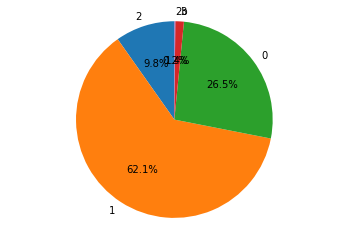

In [4]:
#data["SEVERITYCODE"].describe()
#plt.pie(data["SEVERITYCODE"])
unique = data["SEVERITYCODE"].unique()
labels=unique[:-1]
sizes = Sev_code_only
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

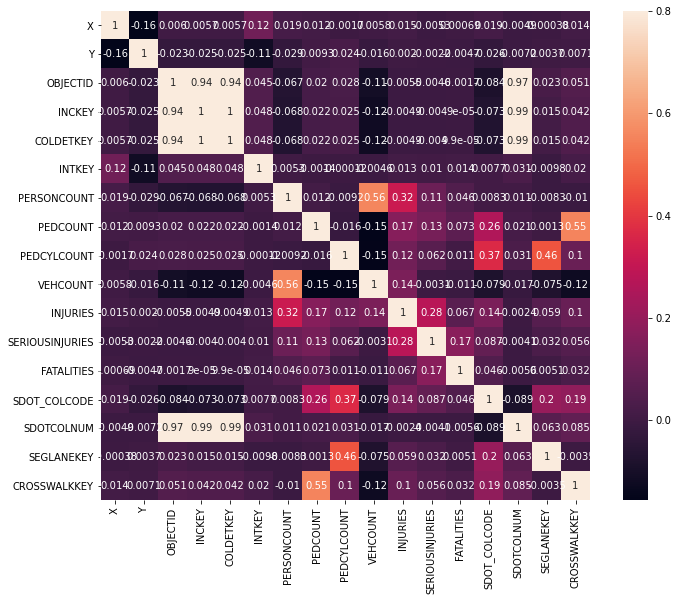

In [5]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);
#sns.heatmap(flights,  fmt="d", linewidths=.5, ax=ax)

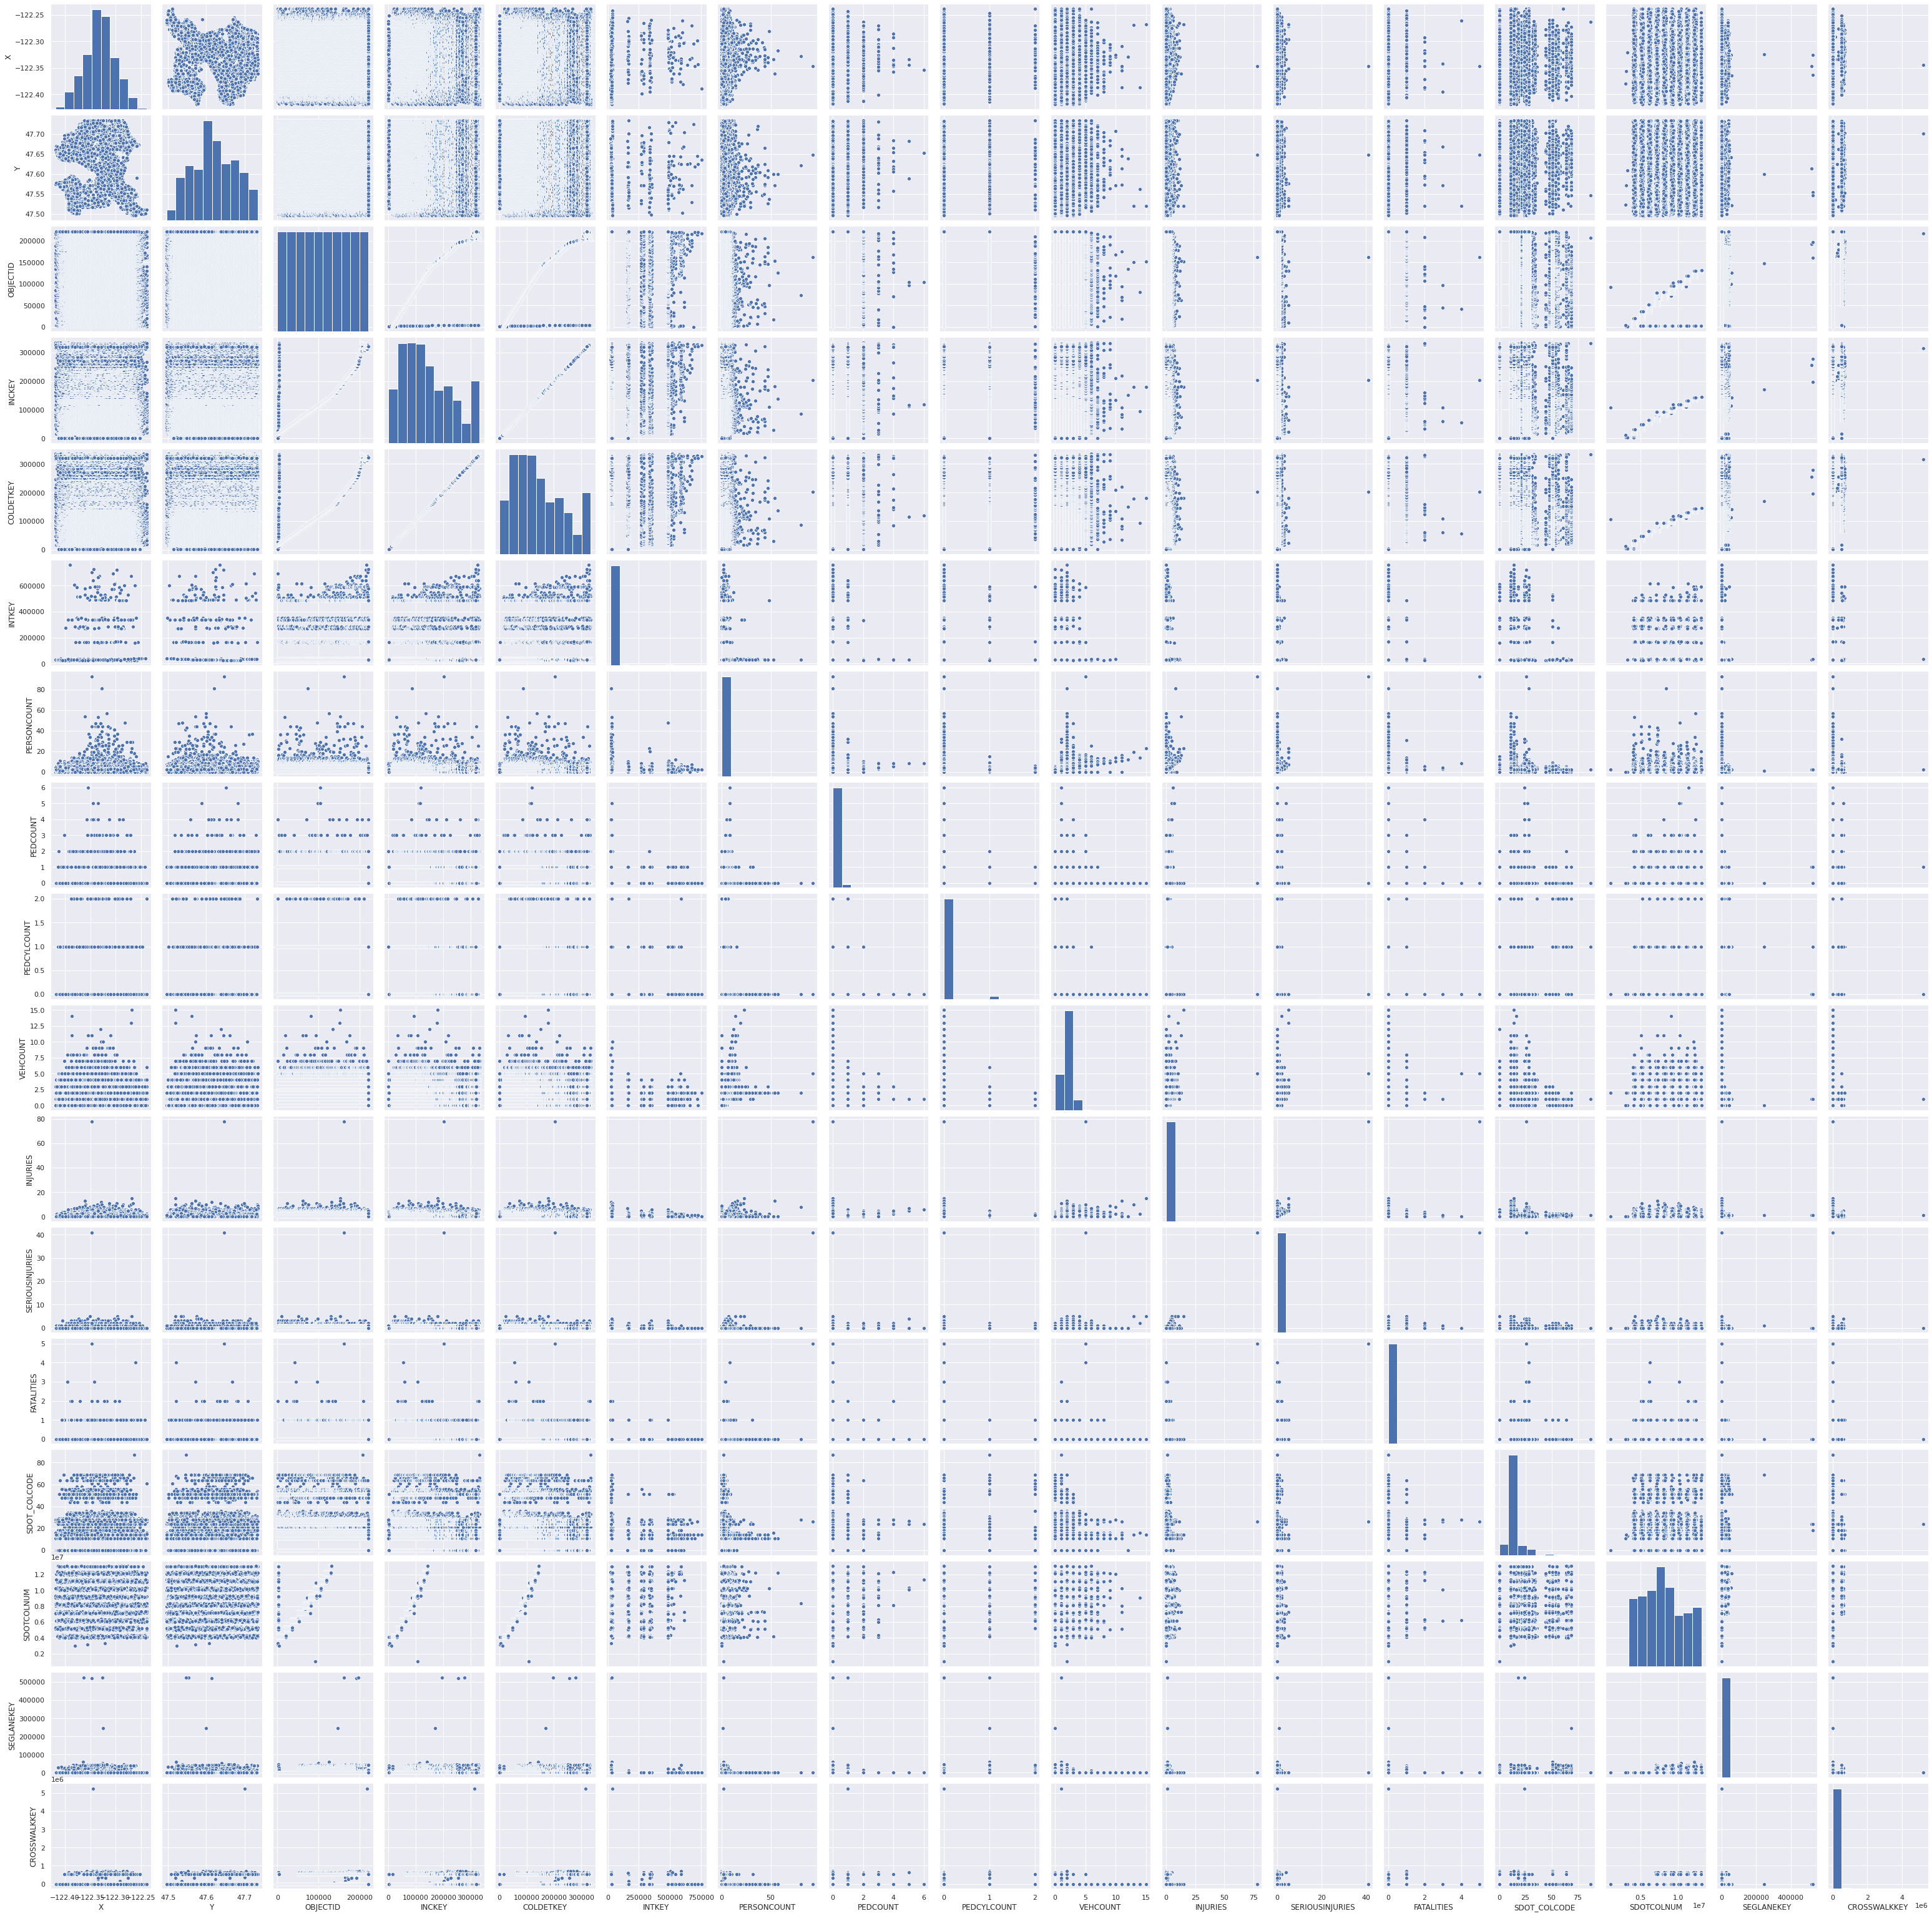

In [6]:
sns.set()
cols = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PEDROWNOTGRNT,216078,0.976553
SPEEDING,211353,0.955199
EXCEPTRSNDESC,209491,0.946784
INATTENTIONIND,191078,0.863567
INTKEY,149443,0.675400
EXCEPTRSNCODE,120403,0.544155
SDOTCOLNUM,94061,0.425104
LIGHTCOND,26776,0.121013
WEATHER,26688,0.120615
ROADCOND,26608,0.120253


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd31b71f940>,
      dtype=object)

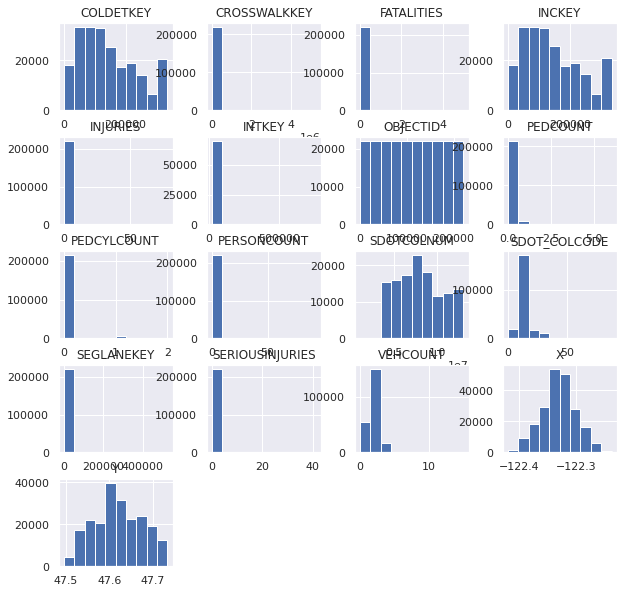

In [8]:
data.hist(figsize=(10,10))

## 3. Methodolody
I will be using Severity code as the predictor attribute. Since this involves discrete variables, rather than continuous, I will use supervised learning - classification. Different model algorithms will be surveyed to get the best train/test accuracy scores, specifically F1 score and ROC curve.